In [77]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle


from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, interactive, fixed, interact_manual
from utils import *

In [78]:
colors = [
    "#fcf444",  # light yellow/pastel yellow
    "#84fc04",  # lime green / neon green
    "#84b4b4",  # blue-green
    "#340cfc",  # deep blue / electric blue
    "#046ccc",  # cyan blue
    "#c0fcfc",  # light cyan
    "#88fcfc",  # very light cyan / soft turquoise
    "#6cb4cc",  # light sky blue / light cerulean blue
    "#dc1cfc",  # bright magenta / electric purple
    "#1005bc",  # deep blue
    "#dedede",  # light gray
    "#fc0c34"   # gainsboro
]

lithology = [
    "Sandstone (Arenito)",
    "Sandstone/Shale (Arenito)",
    "Shale (Argilito)",
    "Marl (Marga)",
    "Dolomite (Dolomita)",
    "Limestone (Calcário)",  
    "Chalk (Giz)",
    "Halite (Halita)",
    "Anhydrite (Anidrita)",
    "Tuff (Tufo)",
    "Coal (Carvão)",
    "Basement (Substrato)" 
]

| Código  | Litologia                          
|---------|------------------------------------
| 30000   | Sandstone (Arenito)                
| 65030   | Sandstone/Shale (Arenito/Argilito) 
| 65000   | Shale (Argilito)                       
| 80000   | Marl (Marga)                       
| 74000   | Dolomite (Dolomita)                
| 70000   | Limestone (Calcário)               
| 70032   | Chalk (Giz)                        
| 88000   | Halite (Halita)                    
| 86000   | Anhydrite (Anidrita)               
| 99000   | Tuff (Tufo)                        
| 90000   | Coal (Carvão)                      
| 93000   | Basement (Substrato)               


In [79]:
#Carregando o conjunto de dados
df = pd.read_csv('Dados/train.csv',sep=';')

df.head() #display das primeiras linhas do dataset

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [80]:
df.info() #informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [81]:
#Contagem de valores únicos

print('Coluna'.ljust(45)+'Valores não-nulos'.ljust(20)+'Tipo de Dado'.ljust(20))
print('_____'*16)
for i in df.columns:
    print(f'{i:<45} {df[i].count():<20} {str(df[i].dtype):<20}')


Coluna                                       Valores não-nulos   Tipo de Dado        
________________________________________________________________________________
WELL                                          1170511              object              
DEPTH_MD                                      1170511              float64             
X_LOC                                         1159736              float64             
Y_LOC                                         1159736              float64             
Z_LOC                                         1159736              float64             
GROUP                                         1169233              object              
FORMATION                                     1033517              object              
CALI                                          1082634              float64             
RSHA                                          630650               float64             
RMED                                     

In [82]:
#Todos os poços tem medidas nulas
df.dropna().info() 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   WELL                               0 non-null      object 
 1   DEPTH_MD                           0 non-null      float64
 2   X_LOC                              0 non-null      float64
 3   Y_LOC                              0 non-null      float64
 4   Z_LOC                              0 non-null      float64
 5   GROUP                              0 non-null      object 
 6   FORMATION                          0 non-null      object 
 7   CALI                               0 non-null      float64
 8   RSHA                               0 non-null      float64
 9   RMED                               0 non-null      float64
 10  RDEP                               0 non-null      float64
 11  RHOB                               0 non-null      float64
 12  GR         

In [83]:
#Verificando número de poços
print(f"Número de poços disponíveis: {len(df.WELL.unique())}")

Número de poços disponíveis: 98


In [84]:
#Criando novas variáveis a partir das variáveis categoricas
LabelEncoder_form = LabelEncoder()
LabelEncoder_group = LabelEncoder()

LabelEncoder_form.fit(df['FORMATION'])
LabelEncoder_group.fit(df['GROUP'])

df['FORMATION_num'] = LabelEncoder_form.transform(df['FORMATION'])
df['GROUP_num'] = LabelEncoder_group.transform(df['GROUP'])

#Salvando os objetos LabelEncoder no formato pickle
with open('Objs/LabelEncoder_form.pkl', 'wb') as f:
    pickle.dump(LabelEncoder_form, f)

with open('Objs/LabelEncoder_group.pkl', 'wb') as f:
    pickle.dump(LabelEncoder_group, f)

C:\Users\Acer3\AppData\Local\Temp\ipykernel_11124\900187158.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
C:\Users\Acer3\AppData\Local\Temp\ipykernel_11124\900187158.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


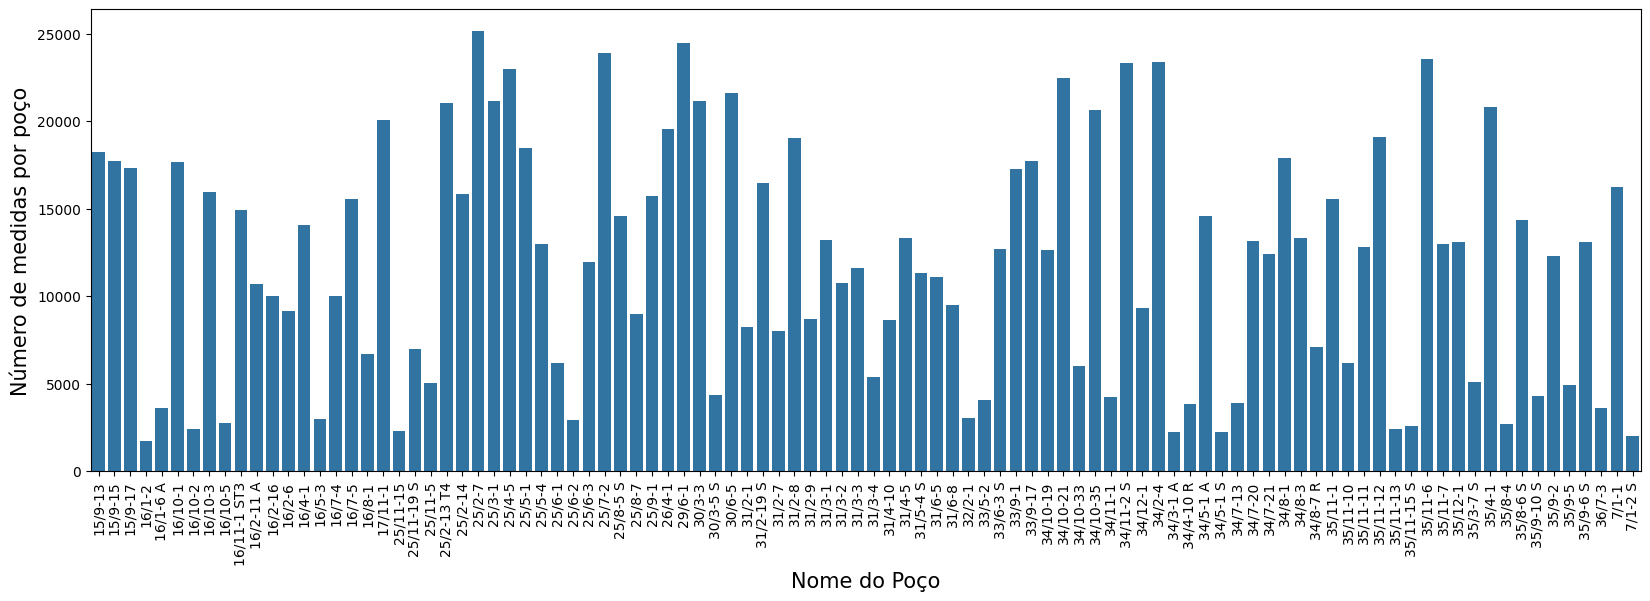

In [85]:
#Plotando um countplot para verificar o número de medidas de cada poço na vertical

fig,axes=plt.subplots(figsize=(20,6))
sns.countplot(x='WELL',data=df,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_xlabel('Nome do Poço',fontsize=15)
axes.set_ylabel('Número de medidas por poço',fontsize=15)
fig.show()

In [86]:
# Para simplificar nossa análise, vamos deletar algumas colunas
cols =['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION','CALI', 'RMED', 'RDEP', 'RHOB',
        'GR','NPHI','DTC', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE','GROUP_num', 'FORMATION_num']

df = df[~df.NPHI.isnull()][cols]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642770 entries, 4238 to 1170446
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               642770 non-null  object 
 1   DEPTH_MD                           642770 non-null  float64
 2   X_LOC                              642770 non-null  float64
 3   Y_LOC                              642770 non-null  float64
 4   Z_LOC                              642770 non-null  float64
 5   GROUP                              642770 non-null  object 
 6   FORMATION                          642770 non-null  object 
 7   CALI                               642770 non-null  float64
 8   RMED                               642770 non-null  float64
 9   RDEP                               642770 non-null  float64
 10  RHOB                               642770 non-null  float64
 11  GR                                 64277

In [87]:
#Verificando número de poços
print(f"Número de poços disponíveis: {len(df.WELL.unique())}")

Número de poços disponíveis: 96


C:\Users\Acer3\AppData\Local\Temp\ipykernel_11124\900187158.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
C:\Users\Acer3\AppData\Local\Temp\ipykernel_11124\900187158.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


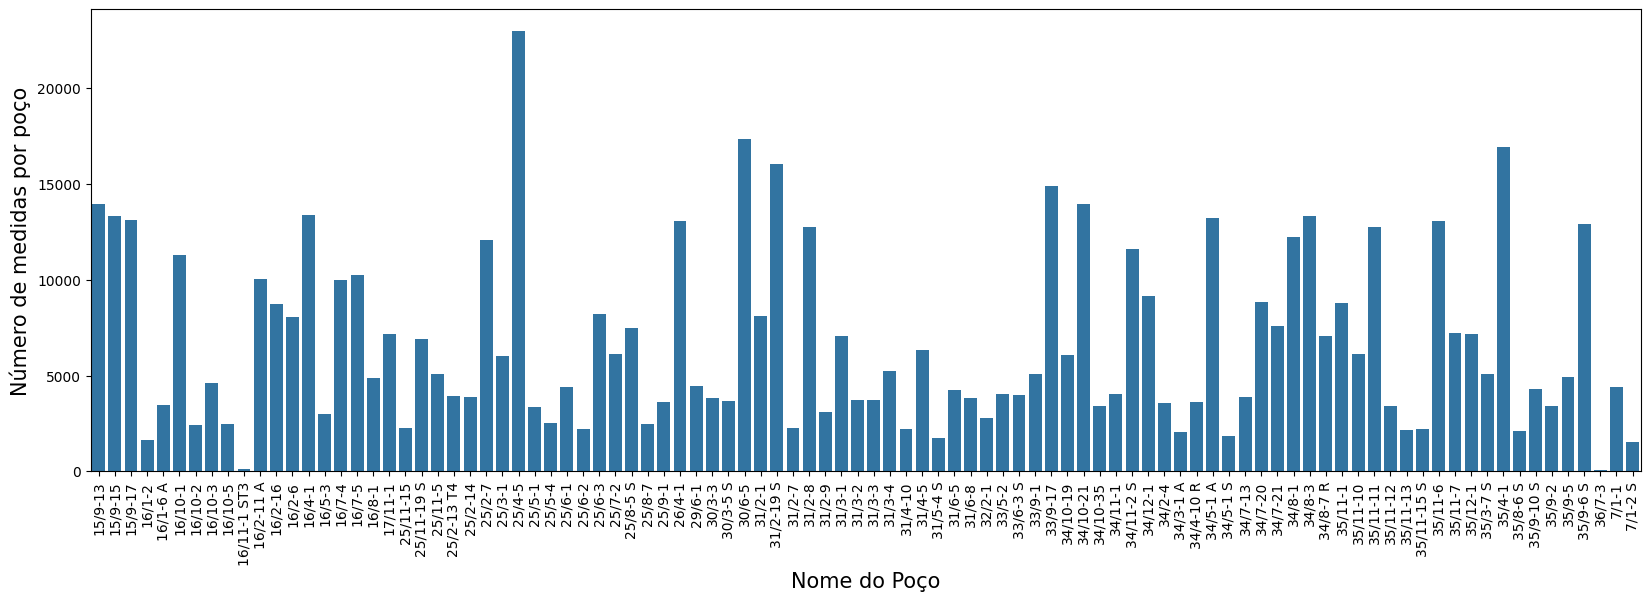

In [88]:
#Plotando um countplot para verificar o número de medidas de cada poço na vertical

fig,axes=plt.subplots(figsize=(20,6))
sns.countplot(x='WELL',data=df,ax=axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_xlabel('Nome do Poço',fontsize=15)
axes.set_ylabel('Número de medidas por poço',fontsize=15)
fig.show()

In [89]:
#Criação de uma coluna com o nome das litologias
lithology_map = {
    30000: 'Sandstone (Arenito)',
    65030: 'Sandstone/Shale (Arenito/Argilito)',
    65000: 'Shale (Argilito)',
    80000: 'Marl (Marga)',
    74000: 'Dolomite (Dolomita)',
    70000: 'Limestone (Calcário)',
    70032: 'Chalk (Giz)',
    88000: 'Halite (Halita)',
    86000: 'Anhydrite (Anidrita)',
    99000: 'Tuff (Tufo)',
    90000: 'Coal (Carvão)',
    93000: 'Basement (Substrato)'
}
df['LITHOLOGY'] = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: lithology_map.get(x, 'Unknown'))
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,GROUP_num,FORMATION_num,LITHOLOGY
4238,15/9-13,1138.704,437640.84375,6470976.0,-1113.655396,NORDLAND GP.,Utsira Fm.,19.322735,1.013309,1.091499,1.774626,55.892757,0.765867,147.837677,30000,1.0,6,67,Sandstone (Arenito)
4239,15/9-13,1138.856,437640.84375,6470976.0,-1113.807373,NORDLAND GP.,Utsira Fm.,18.613674,1.088184,1.122706,1.800986,60.929138,0.800262,142.382431,65000,1.0,6,67,Shale (Argilito)
4240,15/9-13,1139.008,437640.84375,6470976.0,-1113.959473,NORDLAND GP.,Utsira Fm.,18.212072,1.127155,1.148141,1.817696,62.117264,0.765957,138.258331,65000,1.0,6,67,Shale (Argilito)
4241,15/9-13,1139.160,437640.84375,6470976.0,-1114.111450,NORDLAND GP.,Utsira Fm.,18.134182,1.141467,1.170984,1.829333,61.010860,0.702521,139.198914,65000,1.0,6,67,Shale (Argilito)
4242,15/9-13,1139.312,437640.84375,6470976.0,-1114.263428,NORDLAND GP.,Utsira Fm.,18.033762,1.138007,1.184080,1.813854,58.501236,0.639708,144.290085,65000,1.0,6,67,Shale (Argilito)


In [90]:
@interact(well=df.WELL.unique())
def update_well_plot(well):
    plot_well_logs(df, well=well,lithology_col='LITHOLOGY',colors=colors,lithology=lithology,dz=100)

interactive(children=(Dropdown(description='well', options=('15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6…

In [91]:
#Selecionando aleatóriamente 5 poços para serem selecionados como blind e o restante para realizar a aplicação

well_names = df.WELL.isin(np.random.choice(df.WELL.unique(),size=10))

blind = df[well_names]
dataset = df[~well_names]

print(f'Número de amostras separadas para o treino: {len(dataset)}\nNúmero de amostras separadas para o teste cego: {len(blind)}')
print(f'Propoção Teste cego / Treino: {len(blind)/len(dataset)*100:.2f}%')

Número de amostras separadas para o treino: 542441
Número de amostras separadas para o teste cego: 100329
Propoção Teste cego / Treino: 18.50%


In [92]:
#Salvando os datasets
dataset.to_csv('Dados/train_dataset.csv',index=True)
blind.to_csv('Dados/blind_dataset.csv',index=True)